In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util.methods as m
import util.statistics as s
import util.portfolio as p
import scipy.optimize as spo
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


['BABA', 'V', 'MU', 'AAPL', 'MOMO']
['SPY']
Cumulative ret = 0.9417843494121956
Avg Daily ret = 0.001871462919569698
Risk = 0.011539726358658705
Sharpe ratio = 2.5744590395828832
End value = 19417.843494121957


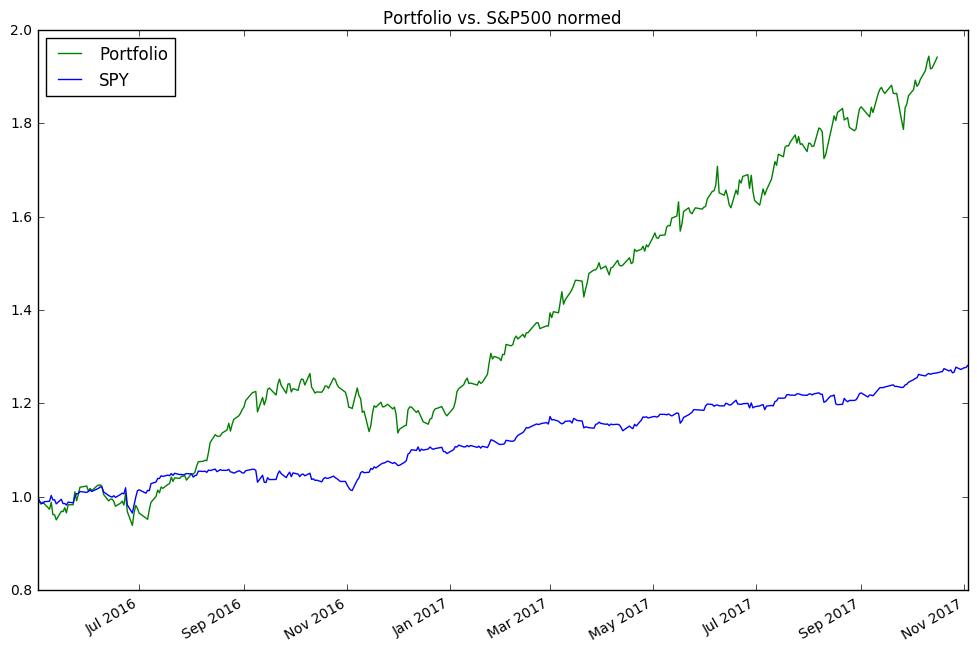

In [52]:
cum_ret, avg_daily_ret, std_daily_ret, sharpe_ratio, end_value =\
p.assess_portfolio('2016-05-01', '2017-11-05', \
                 ['BABA', 'V', 'MU', 'AAPL', 'MOMO'], \
                 [0.2, 0.5, 0.1, 0.1, 0.1], \
                 start_volume=10000, \
                 gen_plot=True)

In [83]:
def sharpe_ratio_allocs(allocs, normed, rfr=0.0, sf=252.0):
    alloced = normed * allocs
    port_val = alloced.sum(axis=1)
    daily_rets = s.daily_returns_simple(port_val)[1:]
    std_daily_ret = daily_rets.std()
    daily_rfr = (1.0 + rfr)**(1/sf) - 1
    sharpe_ratio = sf ** (1/2) * ((daily_rets - daily_rfr).mean() / std_daily_ret)
    return sharpe_ratio

def sharpe_ratio_error(allocs, normed, rfr=0, sf=252):
    return -1 * sharpe_ratio_allocs(allocs, normed, rfr, sf)

dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]
prices = m.get_data(symbols, dates, False).dropna()
normed = m.normalize_data(prices)
print("Sharpe ration = ", sharpe_ratio_allocs(allocs, normed))

cum_ret, avg_daily_ret, std_daily_ret, sharpe_ratio, end_value =\
p.assess_portfolio('2010-01-01', '2010-12-31', \
                 ['GOOG', 'AAPL', 'GLD', 'XOM'], \
                 [0.2, 0.3, 0.4, 0.1], \
                 start_volume=1, \
                 gen_plot=False)

['GOOG', 'AAPL', 'GLD', 'XOM']
Sharpe ration =  1.518270118531521
['GOOG', 'AAPL', 'GLD', 'XOM']
Cumulative ret = 0.2556607488795106
Avg Daily ret = 0.0009574097933872554
Risk = 0.010010346058303803
Sharpe ratio = 1.518270118531521
End value = 1.2556607488795106


In [85]:
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
n = len(symbols)
allocs_guess = [1/n] * n
allocs_bounds = [(0., 1.)] *n
constraints = ({ 'type': 'eq', 'fun': lambda allocs: 1.0 - np.sum(allocs) })
print(allocs_guess)
prices = m.get_data(symbols, dates, False).dropna()
normed = m.normalize_data(prices)
print("Initial Sharpe_ration={}".format(sharpe_ratio_allocs(allocs_guess, normed)))
min_result = spo.minimize(sharpe_ratio_error, allocs_guess, args=(normed,), method='SLSQP', \
                          bounds=allocs_bounds, \
                          constraints=constraints, options={'disp': True})
print("Minimum found at")
print("X = {}, Y = {}".format(min_result.x, min_result.fun))

[0.25, 0.25, 0.25, 0.25]
['GOOG', 'AAPL', 'GLD', 'XOM']
Initial Sharpe_ration=1.2076370727823698
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.004090667190317
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
Minimum found at
X = [  4.62353132e-16   3.96701136e-01   6.03298864e-01   0.00000000e+00], Y = -2.004090667190317


In [87]:
def optimize_portfolio(sd='2010-01-01', ed='2010-12-31', \
    symbols=['GOOG','AAPL','GLD','XOM'], gen_plot=False):
    dates = pd.date_range(sd, ed)
    n = len(symbols)
    allocs_guess = [1/n] * n
    prices = m.get_data(symbols, dates, False).dropna()
    normed = m.normalize_data(prices)
    print("Initial Sharpe_ration={}".format(sharpe_ratio_allocs(allocs_guess, normed)))
    
    allocs_bounds = [(0, 1)] *n
    constraints = ({ 'type': 'eq', 'fun': lambda allocs: 1.0 - np.sum(allocs) })
    min_result = spo.minimize(sharpe_ratio_error, allocs_guess, args=(normed,), method='SLSQP', \
                              bounds=allocs_bounds, \
                              constraints=constraints, options={'disp': True})
    allocs = min_result.x
    print("Optimal Allocs = {}".format(allocs))
    print("Func value = {}".format(sharpe_ratio_allocs(allocs, normed)))
    
    cr, adr, sddr, sr, ev = p.assess_portfolio(sd, ed, symbols, allocs, 1, 0, 252, gen_plot=gen_plot)

    return allocs, cr, adr, sddr, sr

In [90]:
allocs, cr, adr, sddr, sr = optimize_portfolio('2010-01-01', '2010-12-31', \
                            symbols=['GOOG','AAPL','GLD','XOM'], gen_plot=False)

['GOOG', 'AAPL', 'GLD', 'XOM']
Initial Sharpe_ration=1.2076370727823698
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.004090667190317
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
Optimal Allocs = [  4.62353132e-16   3.96701136e-01   6.03298864e-01   0.00000000e+00]
Func value = 2.004090667190317
['GOOG', 'AAPL', 'GLD', 'XOM']
Cumulative ret = 0.36011620838616265
Avg Daily ret = 0.0012771797693225944
Risk = 0.01011660830860862
Sharpe ratio = 2.004090667190317
End value = 1.3601162083861629


['BABA', 'V', 'MU', 'AAPL', 'MOMO']
Initial Sharpe_ration=3.2131676108409466
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4.346963517255858
            Iterations: 11
            Function evaluations: 83
            Gradient evaluations: 11
Optimal Allocs = [ 0.24828884  0.54944471  0.04198687  0.15608192  0.00419766]
Func value = 4.346963517255858
['BABA', 'V', 'MU', 'AAPL', 'MOMO']
['SPY']
Cumulative ret = 0.5583026065206502
Avg Daily ret = 0.0022772767707672165
Risk = 0.008316298921760196
Sharpe ratio = 4.346963517255858
End value = 1.5583026065206502


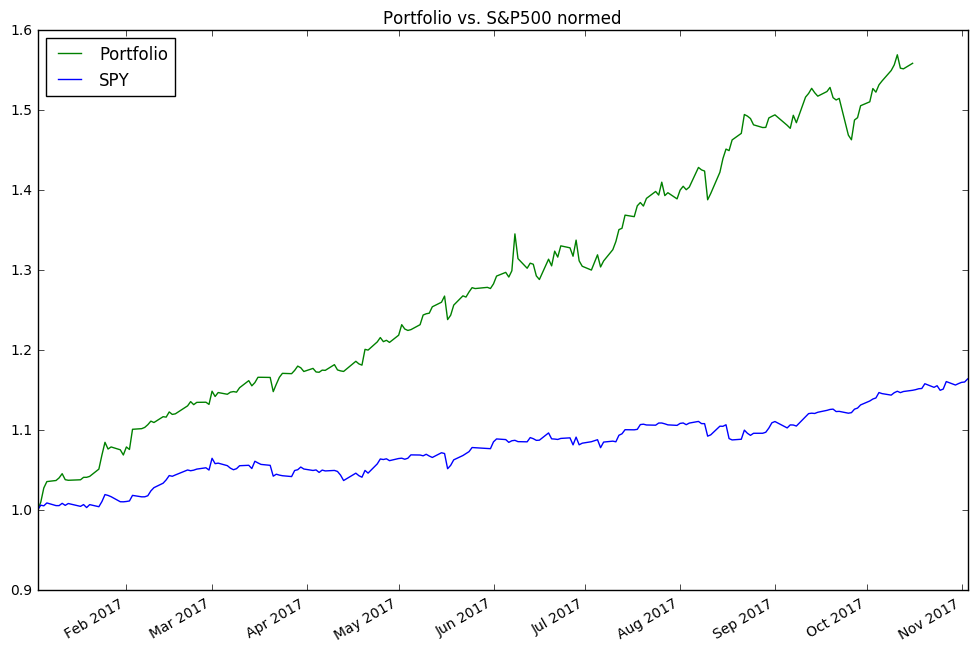

In [94]:
allocs, cr, adr, sddr, sr = optimize_portfolio('2017-01-01', '2017-11-05', \
                                               ['BABA', 'V', 'MU', 'AAPL', 'MOMO'], gen_plot=True)